# Experimenting with Object Detection Models

The ultimate goal is to be able to recognize and pick out a vehicle that is obstructing a bike lane. First, I'll experiment with basic object detection. Hopefully it will be possible to detect both vehicles and bike lanes, then find a way to determine when they occupy the same space. One possible use case is to use my own best model to first determine if an image is showing a vehicle in a bike lane, then applying object detection and/or ALPR on top of that.

## `ObjectDetection` from `imageai`

~~https://www.analyticsvidhya.com/blog/2018/06/understanding-building-object-detection-model-python/~~
https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/README.md

In [1]:
from imageai.Detection import ObjectDetection
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

In [2]:
execution_path = os.getcwd()
execution_path

'/Users/jessemarkowitz/Library/Mobile Documents/com~apple~CloudDocs/Flatiron/capstone/NYC_bike_lanes'

In [5]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(execution_path, 'models/yolo.h5'))
detector.loadModel()

In [6]:
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path, 'other_images/street_image.png'),
                                             output_image_path=os.path.join(execution_path, 'other_images/street_image_new.png'),
                                             minimum_percentage_probability=20)

In [7]:
detections

[{'name': 'traffic light',
  'percentage_probability': 55.38759231567383,
  'box_points': [236, 3, 256, 25]},
 {'name': 'traffic light',
  'percentage_probability': 83.30218195915222,
  'box_points': [262, 7, 282, 30]},
 {'name': 'traffic light',
  'percentage_probability': 61.5342378616333,
  'box_points': [676, 17, 698, 50]},
 {'name': 'person',
  'percentage_probability': 54.32329177856445,
  'box_points': [366, 87, 384, 105]},
 {'name': 'person',
  'percentage_probability': 34.232744574546814,
  'box_points': [619, 91, 644, 115]},
 {'name': 'car',
  'percentage_probability': 98.87317419052124,
  'box_points': [100, 87, 218, 125]},
 {'name': 'person',
  'percentage_probability': 58.204227685928345,
  'box_points': [516, 86, 542, 147]},
 {'name': 'person',
  'percentage_probability': 28.294098377227783,
  'box_points': [597, 93, 621, 134]},
 {'name': 'person',
  'percentage_probability': 72.27807641029358,
  'box_points': [472, 93, 508, 155]}]

In [9]:
for eachObject in detections:
    print(eachObject['name'], ":", eachObject['percentage_probability'], ':', eachObject['box_points'])
    print("-"*20)

traffic light : 55.38759231567383 : [236, 3, 256, 25]
--------------------
traffic light : 83.30218195915222 : [262, 7, 282, 30]
--------------------
traffic light : 61.5342378616333 : [676, 17, 698, 50]
--------------------
person : 54.32329177856445 : [366, 87, 384, 105]
--------------------
person : 34.232744574546814 : [619, 91, 644, 115]
--------------------
car : 98.87317419052124 : [100, 87, 218, 125]
--------------------
person : 58.204227685928345 : [516, 86, 542, 147]
--------------------
person : 28.294098377227783 : [597, 93, 621, 134]
--------------------
person : 72.27807641029358 : [472, 93, 508, 155]
--------------------


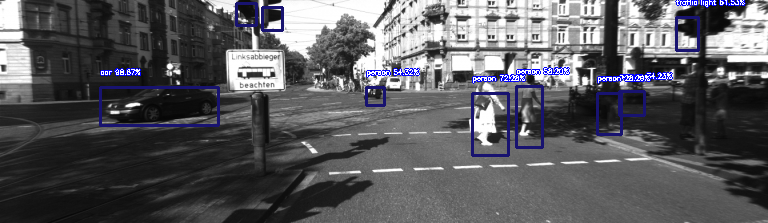

In [11]:
img = Image.open('other_images/street_image_new.png')
img

Okay, that's pretty cool. But will it work on mine?

In [14]:
def get_images(filepath, num_images=None):
    '''
    Given a filepath for a folder of images, return a list of those images
    as arrays of dtype=uint8.
    '''
    # List of filenames
    filenames = os.listdir(filepath)
    # List of full filepaths to each image
    filepaths = [os.path.join(filepath, name) for name in filenames]
    # Return list of files as raw image arrays
    if num_images:
        return [mpimg.imread(img) for img in filepaths[:num_images]]
    else:
        return [mpimg.imread(img) for img in filepaths]

In [64]:
!find . -name ".DS_Store" -delete

In [53]:
images = get_images('other_images/processed_images/vehicle_bike_lane/', num_images=10)

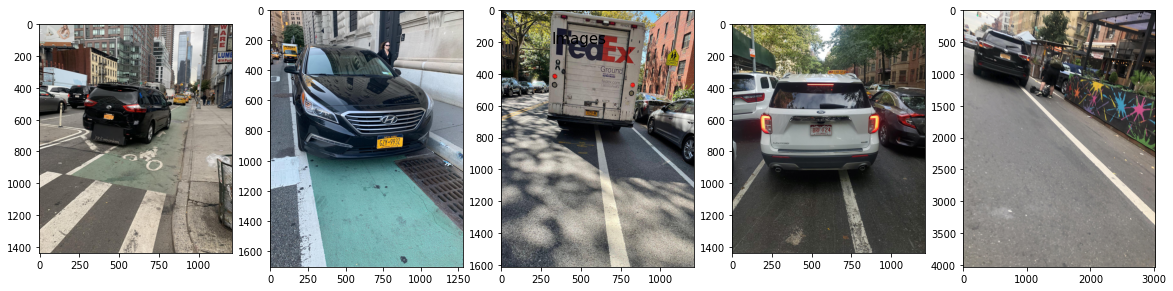

In [54]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(images[i])
fig.suptitle('Images', fontsize=15, y=.8)
fig.tight_layout;

In [62]:
for i, img in enumerate(images):
    detections = detector.detectObjectsFromImage(input_type='array',
                                             input_image=img,
                                             output_image_path=os.path.join(execution_path, f'other_images/object_detection/image_{i}.jpg'))

In [65]:
detected_images = get_images('other_images/object_detection')

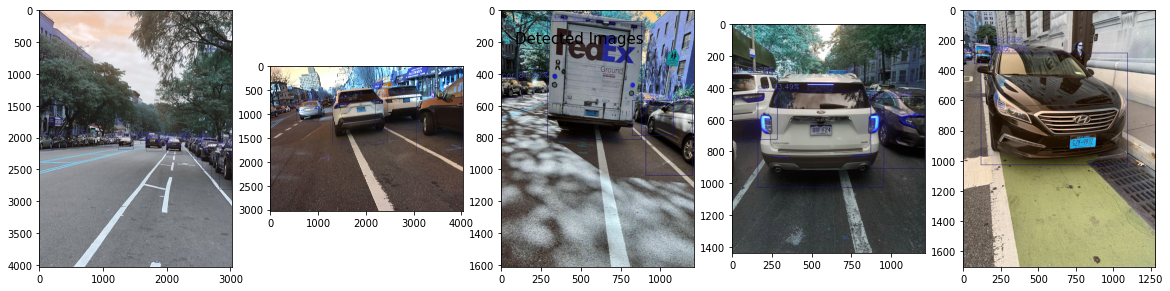

In [66]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(detected_images[i])
fig.suptitle('Detected Images', fontsize=15, y=.8)
fig.tight_layout;

## Custom Detection Model Training

https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/Custom/CUSTOMDETECTIONTRAINING.md

Trying to teach a model to recognize/ID a bike lane in an image. I've labeled about 500 images of bike lanes, many with separately labeled `bike_lane_symbol`s as well and a few with `cyclist`s. Using pre-trained YOLOv3 model.

In [11]:
from imageai.Detection.Custom import DetectionModelTrainer

In [12]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

In [14]:
# Set filepath to training images and labels
trainer.setDataDirectory(data_directory='other_images/object_detection/bike_lane_detection')
# Give list of object names in annotations to train on and filepath for pre-trained model
trainer.setTrainConfig(object_names_array=['bike_lane', 'bike_lane_symbol', 'cyclist'], 
                       train_from_pretrained_model='models/pretrained-yolov3.h5')
trainer.trainModel()

Generating anchor boxes for training images and annotation...
not well-formed (invalid token): line 1, column 0
Ignore this bad annotation: other_images/object_detection/bike_lane_detection/train/annotations/.DS_Store
Average IOU for 9 anchors: 0.69
Anchor Boxes generated.
Detection configuration saved in  other_images/object_detection/bike_lane_detection/json/detection_config.json
not well-formed (invalid token): line 1, column 0
Ignore this bad annotation: other_images/object_detection/bike_lane_detection/validation/annotations/.DS_Store
Evaluating over 50 samples taken from other_images/object_detection/bike_lane_detection/validation
Training over 456 samples  given at other_images/object_detection/bike_lane_detection/train
Training on: 	['bike_lane', 'bike_lane_symbol', 'cyclist']
Training with Batch Size:  4
Number of Training Samples:  456
Number of Validation Samples:  50
Number of Experiments:  100
Training with transfer learning from pretrained Model


/opt/anaconda3/envs/retinanet/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
  8/912 [..............................] - ETA: 3:43:57 - loss: 166.4092 - yolo_layer_6_loss: 24.9043 - yolo_layer_7_loss: 48.3569 - yolo_layer_8_loss: 81.5696

KeyboardInterrupt: 

LOL, it wants 912 steps per epoch at 4 hours per epoch for 100 epochs? Hard pass. Time for Google Colab! (Colab yields about 20min/epoch currently)